<a href="https://colab.research.google.com/github/viniciusbohn/data_science/blob/main/VBB_%5BPTBR%5D_Analisando_os_Dados_do_Airbnb_N%C3%A1poles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Nápoles *(Naples)*

## Um *case* de sucesso: *Airbnb*

Você sabia que a denominada **maior empresa hoteleira da atualidade não possui nenhum hotel?** Não? Pois conheça a plataforma inovadora da [Airbnb](https://www.airbnb.com.br/).

O Airbnb foi criado em 2007 quando dois anfitriões receberam três convidados em sua casa em *San Francisco, CA, USA*. Desde então a plataforma cresceu exponencialmente, através dela cerca de 4 milhões de anfitriões abriram as portas de seus estabelecimentos para mais de 1 bilhão de hóspedes.

O conceito da plataforma visa proporcionar praticidade e qualidade na experiência do usuário, seja ele um anfitrião ou hospéde. É esse conceito, até então, tem conquistado os clientes. Mais de US$ 150.000.000,00 já foram arrecadados por anfitriões, desde a implantação da plataforma (dados de fevereiro de 2022).

Uma das iniciativas mais interessantes por parte do Airbnb é disponibilizar dados de hospedagem de algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## *La meravigliosa Napoli*

A cidade de Nápoles é repleta de atrações turísticas e paisagens exuberantes, agradando tanto os apaixonados pela história, com seus museus e catedrais, quanto aqueles que preferem aproveitar uma praia. A região é famosa também pela sua culinária, sendo responsável pela criação da nossa querida pizza. O quê melhor do que saborear a mais tradicional pizza em seu local de criação?

<br>
<center><img alt="Castel dell'Ovo" width="70%" src="https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1b/43/11/1e/nice-area-to-stroll-at.jpg?w=1200&h=-1&s=1"></center>
<center><i>Castel dell'Ovo</i>, em Nápoles</center>
<br>

Napóles é a terceira maior cidade da Itália, depois de Roma e Milão, e é a capital da região da Campânia. A cidade também respira o futebol, sendo a casa da *Società Sportiva Calcio Napoli*, famosa equipe italiana por onde brilharam estrelas do esporte como *Edinson Cavani*, Careca e *Diego Armando Maradona*, este último que também dá o nome ao estádio onde o time manda seus jogos.

<br>
<br>

<center><img alt="Estádio Diego Armando Maradona" width="70%" src="https://istoe.com.br/wp-content/uploads/sites/14/2020/12/san-paolo-scaled.jpg"></center>
<center>Estádio <i>Diego Armando Maradona</i>, em Nápoles</center>


Agora que já fomos introduzidos ao Airbnb e à cidade de Nápoles, iremos analisar dados de hospedagens na cidade, extraídos diretamente da plataforma do Airbnb. Os dados retirados do site são brutos, portanto serão realizadas uma série de operações com os dados, visando a obtenção de *insights* mais confiáveis e relevantes.

## Obtenção dos Dados


Os dados serão obtidos através da *Inside Airbnb*, mecanismo em que a plataforma *Airbnb* disponibiliza os dados de hospedagem de maneira pública. Para esta análise será utilizado o arquivo: listings.csv - Summary information and metrics for listings in Naples (good for visualisations).

In [66]:
# Importação dos pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [67]:
# Importação do arquivo 'listings.csv' do Inside Airbnb
df = pd.read_csv('http://data.insideairbnb.com/italy/campania/naples/2021-12-15/visualisations/listings.csv')

## Análise dos Dados


Abaixo está fornecido o dicionário com todas as variáveis utilizadas nesta análise, de forma a facilitar o entendimento da estruturação dos dados. Este recurso pode ser utilizado para consulta posterior no decorrer da análise.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [68]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30466,Naturists rooms in the heart of city,14169118,Gigi,NaN,San Carlo all'Arena,40.85759,14.25943,Private room,52,2,0,NaN,NaN,8,1,0,NaN
1,30536,cosy room to let in naples,14169118,Gigi,NaN,San Lorenzo,40.85543,14.25812,Private room,41,2,17,2017-11-27,0.12,8,43,0,NaN
2,63413,Charming Room on Riviera di Chiaia,309483,Paola,NaN,Chiaia,40.83319,14.22613,Entire home/apt,50,2,70,2021-11-14,0.71,1,350,9,NaN
3,74364,Cozy place in a princely Palace inside Old Town,289412,Davide,NaN,San Lorenzo,40.85120,14.25217,Entire home/apt,41,4,183,2021-11-16,1.43,8,222,23,NaN
4,76993,"Central Cebollitas B&B, spacious private ensuite.",411650,Cebollitas,NaN,Vomero,40.84568,14.22618,Private room,41,3,14,2021-10-22,0.16,4,338,4,NaN


### Análise Preliminar dos Dados

Inicialmente, vamos verificar a quantidade de entradas e variáveis do nosso DataFrame. Em seguida será verificada o tipo de cada variável, com o intuito de identificar um possível problema na formatação dos dados.

In [69]:
# identificar o volume de dados do DataFrame
print('Entradas:', df.shape[0])
print('Variáveis:', df.shape[1])

Entradas: 7151
Variáveis: 18


In [70]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [71]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.958328
reviews_per_month                 0.239687
last_review                       0.239687
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Através da análise realizada é possível afirmar que:

*   Os valores da coluna `neighbourhood_group` são 100% nulos/faltantes;
*   A coluna `license` possui cerca de 95,83% de valores nulos/faltantes;
*   As colunas `reviews_per_month` e `last_review` possuem cerca de 23,97% de valores nulos/faltantes.

Fazendo uma "dupla verificação" através da quantidade de valores de cada coluna, pode-se visualizar a mesma informação através de valores brutos:




In [72]:
df.count().sort_values(ascending=False)

id                                7151
room_type                         7151
number_of_reviews_ltm             7151
availability_365                  7151
calculated_host_listings_count    7151
number_of_reviews                 7151
minimum_nights                    7151
name                              7151
price                             7151
longitude                         7151
latitude                          7151
neighbourhood                     7151
host_name                         7151
host_id                           7151
last_review                       5437
reviews_per_month                 5437
license                            298
neighbourhood_group                  0
dtype: int64

### Tratamento dos Valores Ausentes

Conforme verificado nas etapas anteriores, possuímos quatro colunas que apresentam valores ausentes, são elas:

* `neighbourhood_group`
* `licenses`
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês


A coluna `neighbourhood_group` será excluída sem impacto à análise, visto que não apresenta nenhum dado.

A coluna `licenses` será excluída sem impacto à análise, visto que os (poucos) dados contidos na coluna não são relevantes ao estudo.

Primeiramente vamos criar uma cópia do DataFrame original (`df` - original | `df_np` - cópia), evitando executar alterações definitivas na nossa fonte de dados válida.

In [73]:
df_np = df.copy()

In [74]:
df_np.drop(columns=['neighbourhood_group', 'license'], inplace=True)
df_np.count().sort_values(ascending=False)

id                                7151
name                              7151
host_id                           7151
host_name                         7151
neighbourhood                     7151
latitude                          7151
longitude                         7151
room_type                         7151
price                             7151
minimum_nights                    7151
number_of_reviews                 7151
calculated_host_listings_count    7151
availability_365                  7151
number_of_reviews_ltm             7151
last_review                       5437
reviews_per_month                 5437
dtype: int64

Note que ambas as colunas foram removidas da listagem.

Para entendermos melhor os dados ausentes nas colunas `last_review` e `reviews_per_month`, vamos executar uma série de testes. Para isso vamos criar uma cópia do nosso DataFrame `df_np`.

In [75]:
df_teste = df_np.copy()

In [76]:
# removendo todas as linhas em que a coluna last_review possuí valores nulos
df_teste.dropna(subset = ['last_review'], inplace = True)

# fazendo nova contabilização dos valores em cada coluna
df_teste.count().sort_values(ascending=False)


id                                5437
name                              5437
host_id                           5437
host_name                         5437
neighbourhood                     5437
latitude                          5437
longitude                         5437
room_type                         5437
price                             5437
minimum_nights                    5437
number_of_reviews                 5437
last_review                       5437
reviews_per_month                 5437
calculated_host_listings_count    5437
availability_365                  5437
number_of_reviews_ltm             5437
dtype: int64

Note que ao remover todas as linhas cujo valor da coluna `last_review` é nulo, ficamos com a mesma quantidade de valores para as colunas `last_review` e `reviews_per_month`. Com base nisso, podemos fazer a seguinte leitura: as entradas (linhas) que possuem valores nulos em ambas colunas, são hospedagens que nunca receberam nenhuma revisão (*review*), portanto possuem valores nulos para "última revisão" (`last_review`) e "revisões por mês" (`reviews_per_month`). Podemos fazer a prova real da situação utilizando a coluna `number_of_reviews`:

In [77]:
df_teste.query('number_of_reviews == 0')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [78]:
df_np.query('number_of_reviews == 0')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,30466,Naturists rooms in the heart of city,14169118,Gigi,San Carlo all'Arena,40.857590,14.259430,Private room,52,2,0,NaN,NaN,8,1,0
27,212791,"""Oriente"" room in the heart of historical center.",14169118,Gigi,San Giuseppe,40.848770,14.254120,Private room,75,2,0,NaN,NaN,8,336,0
30,215400,B&B Il Viaggiatore: stanza Gialla,1191263,Giuliano,San Giuseppe,40.847970,14.250140,Private room,135,2,0,NaN,NaN,4,353,0
39,256461,Beautiful B & B Casa Avallone,1349033,Imma,Montecalvario,40.844760,14.245390,Private room,75,4,0,NaN,NaN,1,357,0
44,296874,""" Ténéré "" room in the heart of historical cen...",14169118,Gigi,Stella,40.859930,14.249940,Private room,75,2,0,NaN,NaN,8,333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,53791396,Coccy House Via Chiaia,41055311,Alessandro,Chiaia,40.836780,14.244090,Entire home/apt,160,4,0,NaN,NaN,2,294,0
7147,53796440,Entire 3floorshouse located in the heart of Na...,420163613,Luca,Montecalvario,40.843990,14.247690,Entire home/apt,168,3,0,NaN,NaN,1,365,0
7148,53803224,Boat Apartment,201800726,Francesco,Porto,40.842979,14.256135,Entire home/apt,40,1,0,NaN,NaN,1,215,0
7149,53814936,Plebiscito large easy room,45441011,Fernando,San Ferdinando,40.835850,14.246990,Private room,22,1,0,NaN,NaN,3,359,0


Utilizando o método `query`, podemos verificar que no DataFrame de teste (`df_teste`), em que foram removidas as entradas cujas colunas `last_review` e `reviews_per_month` são nulas, não tivemos nenhum retorno, ou seja, o DataFrame não possui nenhuma entrada cujo valor da coluna `number_of_reviews` é 0. Enquanto o mesmo método nos retorna 1714 linhas quando pesquisado no DataFrame `df_np`, a exata quantidade de linhas removidas no DataFrame de teste (`df_teste`).

Com base na análise realizada com relação aos valores ausentes nas colunas `last_review` e `reviews_per_month`, foi possível fazer a validação da hipótese de que as entradas que possuem estes valores nulos são aquelas que não possuem nenhuma revisão (`number_of_reviews` = 0). Optou-se por remover, em definitivo, a coluna `last_review`, tendo em vista que a mesma é uma entrada no formato de data e é irrelevante à análise, e preencher os valores nulos da coluna `reviews_per_month` por 0.

In [79]:
# remoção da coluna last_review
df_np.drop(columns=['last_review'], inplace=True)

In [80]:
# preenchimento dos valores nulos da coluna reviews_per_month por 0
df_np.reviews_per_month.fillna(0, inplace=True)

In [81]:
df_np.count().sort_values(ascending=False)

id                                7151
name                              7151
host_id                           7151
host_name                         7151
neighbourhood                     7151
latitude                          7151
longitude                         7151
room_type                         7151
price                             7151
minimum_nights                    7151
number_of_reviews                 7151
reviews_per_month                 7151
calculated_host_listings_count    7151
availability_365                  7151
number_of_reviews_ltm             7151
dtype: int64

### Análise Preliminar dos Dados II 

Para darmos sequência na análise dos dados, vamos verificar a distribuição das variáveis.

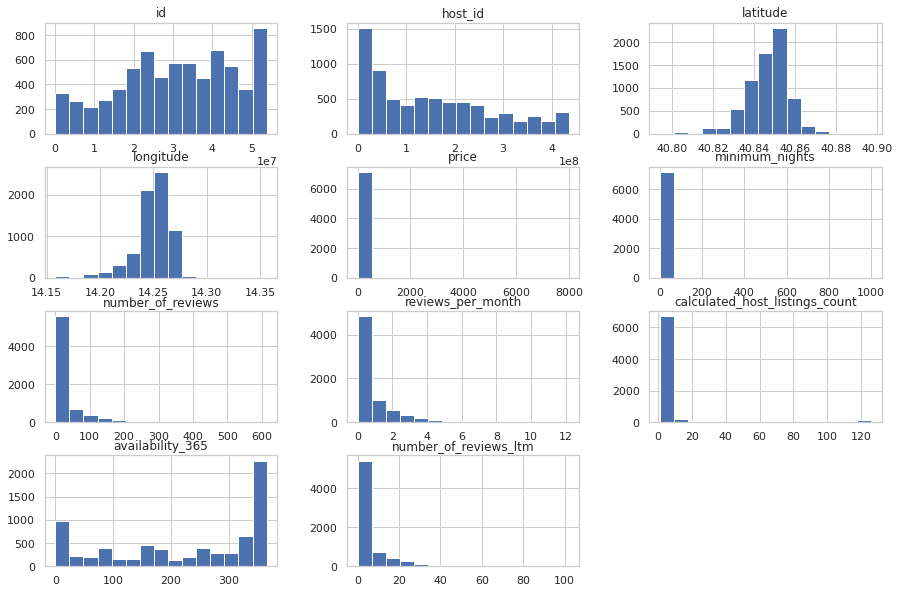

In [82]:
# plotar o histograma das variáveis numéricas
df_np.hist(bins=15, figsize=(15,10));

É importante verificarmos a presença de *outliers* nos dados. Os *outliers* são valores que diferem exageradamente dos demais, muitas vezes denominados "causas especiais". Uma ferramenta simples e interessante para realizarmos esta verificação é a função `describe()`, que nos dá um resumo estatístico das variáveis.

In [83]:
df_np[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,7151.000000,7151.000000,7151.000000,7151.000000,7151.000000
mean,91.803524,2.604811,31.139002,0.838782,223.069221
std,285.045172,21.982686,57.832575,1.235691,131.599936
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,0.020000,98.000000
50%,65.000000,1.000000,6.000000,0.310000,262.000000
75%,90.000000,2.000000,34.000000,1.170000,348.000000
max,8000.000000,1000.000000,614.000000,12.180000,365.000000


Fazendo uma breve leitura do resultado da função `describe()`, é possível analisar que:

*   A variável `price` tem o mínimo em 0;
*   É possível identificar ao menos um *outlier* na variável `price`, tendo em vista que o Q3 está em €90 e possuímos um valor máximo em €8.000;

*   Na variável `minimum_nights` temos o Q3 em 2 e um valor máximo em 1000, claramente há um ou mais *outliers*.




### Tratamentos dos *Outliers*

Para tratamento dos *Outliers* será utilizado o IQR *Score*. Sendo o IQR a subtração do Terceiro Quartil (75%) pelo Primeiro Quartil (25%)

**IQR = Q3 - Q1**

#### Variável `price`

In [84]:
# identificar o iqr da variável price
q1_price = df_np.price.quantile(.25)
q3_price = df_np.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definir os limites superiores e inferiores                                      
sup_price = q3_price + (1.5 * IQR_price)
inf_price = q1_price - (1.5 * IQR_price)

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  43.0
Limite superior de price:  154.5
Limite inferior de price:  -17.5


Vamos ilustrar os dados originais para a variável `price` através de um *Boxplot*.

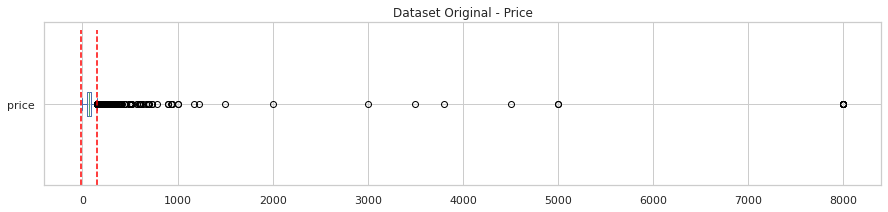

O dataset possui 7151 colunas
442 Entradas acima de 154.5
Representam 6.18% do dataset


In [85]:
fig, ax = plt.subplots(figsize=(15,3))
df_np.price.plot(kind='box', vert=False);
plt.axvline(sup_price, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_price, color='red', ls='--', ymin = 0, ymax = 0.95);
ax.set_title('Dataset Original - Price')
plt.show()

print("O dataset possui {} colunas".format(df_np.shape[0]))
print("{} Entradas acima de 154.5".format(len(df_np[df_np.price >= 154.5])))
print("Representam {:.2f}% do dataset".format((len(df_np[df_np.price > 154.5]) / df_np.shape[0])*100))

Tendo feito essa análise prévia da variável `price`, podemos prosseguir com a limpeza dos dados acima do Limite Superior de Controle e também excluir os valores iguais a 0. Para evitar a modificação do nosso DataFrame de base, vamos criar uma cópia para realizar a limpeza nesse primeiro momento.

In [86]:
# copiar o dataset
df_clean = df_np.copy()
# excluir valores acima do limite superior
df_clean.drop(df_clean[df_clean.price >= 154.5].index, axis=0, inplace=True)
# excluir valores iguais a 0
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_np.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (7151, 15)
Shape após a limpeza:  (6706, 15)


In [87]:
7151 - 6706

445

Podemos verificar que a limpeza dos *outliers* resultou em uma redução de 445 linhas. Vamos verificar como fica a representação gráfica do DataFrame pós-limpeza.

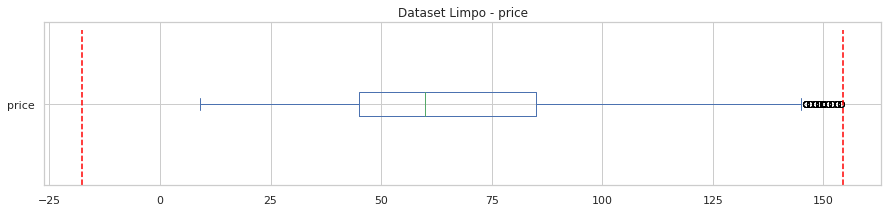

In [88]:
# verificar o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
plt.axvline(sup_price, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_price, color='red', ls='--', ymin = 0, ymax = 0.95);
ax.set_title('Dataset Limpo - price')
plt.show()


Note que o gráfico *Boxplot* do DataFrame "limpo" apresenta alguns *outliers*, isso se deve ao fato do mesmo estar considerando os quartis calculados com os dados do `df_clean`. Se considerarmos as linhas tracejadas, que representam os limites de controle do DataFrame original (`df_np`), pode-se verificar que os valores estão dentro da faixa estabelecida pelas mesmas. Para facilitar a visualização, vamos plotar as duas condições em formato de histograma.

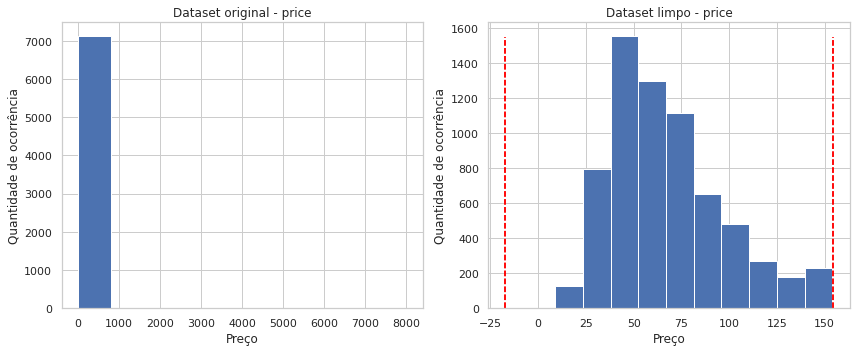

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

df_np.price.plot(kind = 'hist', ax = ax1)
plt.axvline(sup_price, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_price, color='red', ls='--', ymin = 0, ymax = 0.95);
ax1.set_title("Dataset original - price")
ax1.set_xlabel("Preço")
ax1.set_ylabel("Quantidade de ocorrência")


df_clean.price.plot(kind = 'hist', ax = ax2)
plt.axvline(sup_price, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_price, color='red', ls='--', ymin = 0, ymax = 0.95);
ax2.set_title("Dataset limpo - price")
ax2.set_xlabel("Preço")
ax2.set_ylabel("Quantidade de ocorrência")

plt.tight_layout()

Agora que já tratamos os dados da variável `price`, precisamos realizar o mesmo processo com a variável `minimum_nights`.

#### Variável `minimum_nights`

In [90]:
# identificar o iqr da variável minimum_nights
q1_minimum_nights = df_np.minimum_nights.quantile(.25)
q3_minimum_nights = df_np.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definir os limites superiores e inferiores                                      
sup_minimum_nights = q3_minimum_nights + (1.5 * IQR_minimum_nights)
inf_minimum_nights = q1_minimum_nights - (1.5 * IQR_minimum_nights)

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nights:  3.5
Limite inferior de minimum_nights  -0.5


Vamos ilustrar os dados originais para a variável `minimum_nights` através de um *Boxplot*.

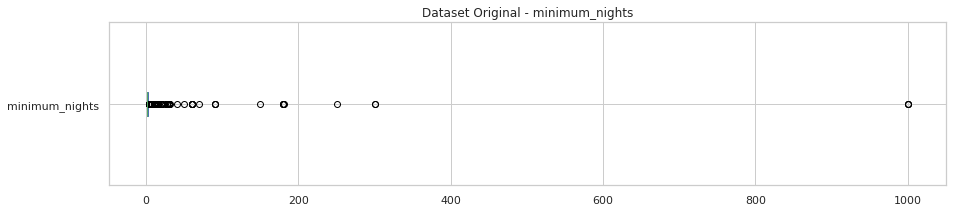

O dataset possui 7151 colunas
310 Entradas acima de 3.5
Representam 4.34% do dataset


In [91]:
fig, ax = plt.subplots(figsize=(15,3))
df_np.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

print("O dataset possui {} colunas".format(df_np.shape[0]))
print("{} Entradas acima de 3.5".format(len(df_np[df_np.minimum_nights > 3.5])))
print("Representam {:.2f}% do dataset".format((len(df_np[df_np.minimum_nights > 3.5]) / df_np.shape[0])*100))

Tendo feito essa análise prévia da variável `minimum_nights`, podemos prosseguir com a limpeza dos dados acima do Limite Superior de Controle. Vamos seguir utilizando nosso DataFrame `df_clean`.

In [92]:
df_clean.drop(df_clean[df_clean.minimum_nights >= 3.5].index, axis=0, inplace=True)

Verificando como fica o gráfico *Boxplot* do DataFrame pós-limpeza:

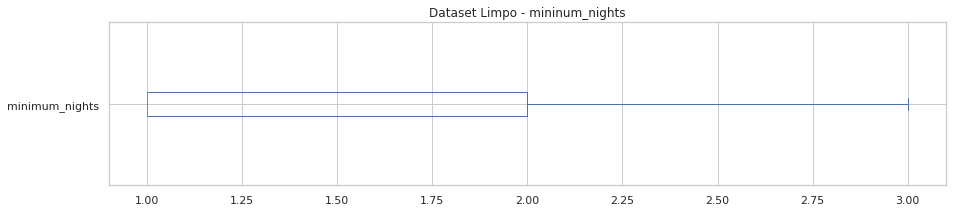

In [93]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - mininum_nights')
plt.show()

Realizando a comparação pré e pós-limpeza através de histogramas:

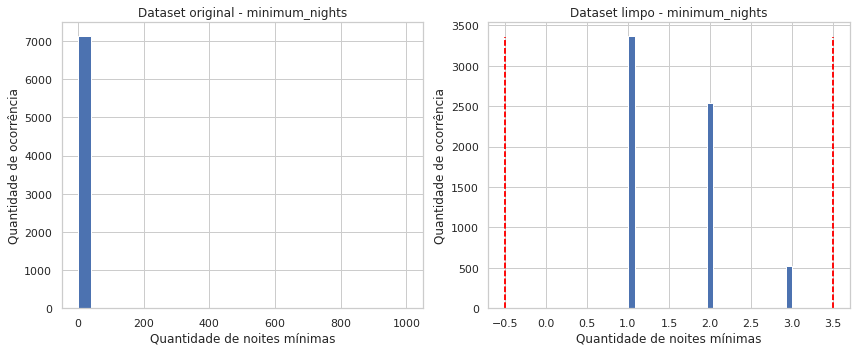

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
df_np.minimum_nights.plot(kind = 'hist', ax = ax1, bins = 25)
plt.axvline(sup_minimum_nights, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_minimum_nights, color='red', ls='--', ymin = 0, ymax = 0.95);
ax1.set_title("Dataset original - minimum_nights")
ax1.set_xlabel("Quantidade de noites mínimas")
ax1.set_ylabel("Quantidade de ocorrência")

df_clean.minimum_nights.plot(kind = 'hist', ax = ax2, bins = 25)
plt.axvline(sup_minimum_nights, color='red', ls='--', ymin = 0, ymax = 0.95);
plt.axvline(inf_minimum_nights, color='red', ls='--', ymin = 0, ymax = 0.95);
ax2.set_title("Dataset limpo - minimum_nights")
ax2.set_xlabel("Quantidade de noites mínimas")
ax2.set_ylabel("Quantidade de ocorrência")

plt.tight_layout()

Vamos ver os histogramas das variáveis pós-tratamento dos *outliers*:

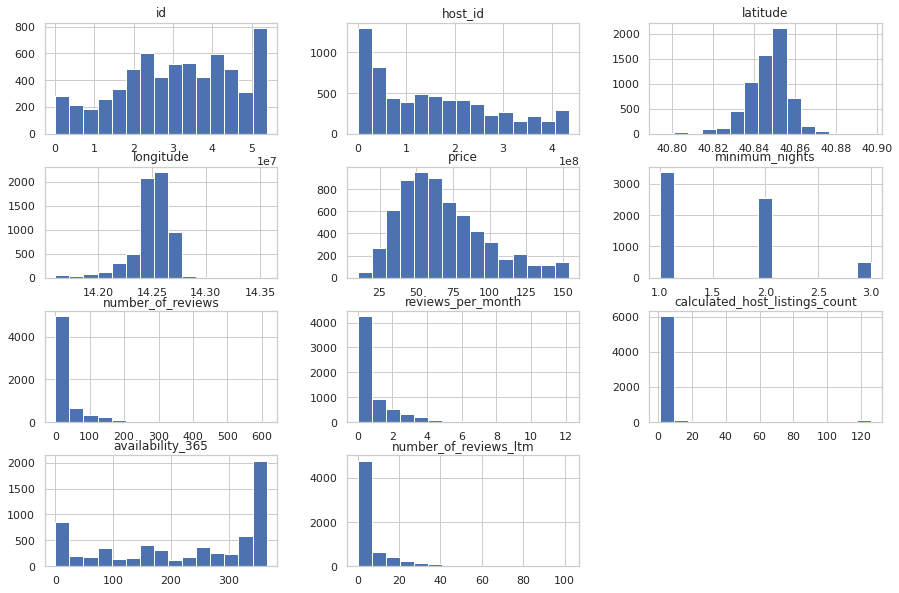

In [95]:
df_clean.hist(bins=15, figsize=(15,10));

In [96]:
df_clean.shape

(6426, 15)

### Análise dos Dados

Agora com os dados tratados, podemos adentrar e explorar a vasta de gama de informações que estes nos trazem. Para iniciarmos, vamos fazer uma análise de correlação das variáveis, de forma a facilitar a visualização da lógica entre os dados.

In [97]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.002866,-0.203363,-0.244501,0.032286,0.085714
minimum_nights,0.002866,1.000000,0.122857,0.063010,0.028262,-0.076716
number_of_reviews,-0.203363,0.122857,1.000000,0.703285,-0.056415,-0.002958
reviews_per_month,-0.244501,0.063010,0.703285,1.000000,0.046706,0.039179
calculated_host_listings_count,0.032286,0.028262,-0.056415,0.046706,1.000000,0.065400
availability_365,0.085714,-0.076716,-0.002958,0.039179,0.065400,1.000000


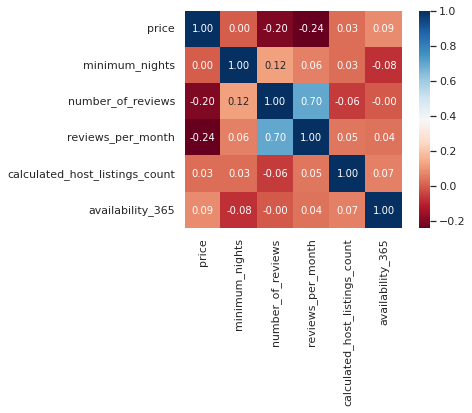

In [98]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Através do mapa de calor, podemos identificar apenas um grau de correlação minimamente relevante: número de revisões (`number_of_reviews`) e revisões por mês (`reviews_per_month`). Porém, um grau de correlação de 0.70 é muito baixo para considerarmos uma correlação direta das variáveis, muito provavelmente não seria possível afirmar uma correlação com um nível de confiança estatisticamente alto (ex.: 95%).

Visto que pouco pudemos extrair da matriz de correlação, vamos partir para o conhecimento tácito!

#### Preço Médio x Bairro

Sabemos que uma das informações mais relevantes quando trata-se de hospedagens é o preço, afinal é um dos fatores de maior importância quando programamos nossas viagens, certo? 

Pois bem, então vamos iniciar analisando qual a média do preço do aluguel de uma diária na cidade de Nápoles.

In [99]:
mean_price = (f'{df_clean.price.mean():.2f}')
euro_to_brl = 5.55
brlmean_price = (f'{df_clean.price.mean() * euro_to_brl:.2f}')

print(f'O preço médio para aluguel de uma diária em Nápoles é de €{mean_price}.')
print(f'Considerando a conversão de 1€ = R$5.55, temos que a média em BRL é R${brlmean_price}.')

O preço médio para aluguel de uma diária em Nápoles é de €67.91.
Considerando a conversão de 1€ = R$5.55, temos que a média em BRL é R$376.92.


Um preço médio bastante razoável. Mas será que há muita variação dentre os diferentes bairros da cidade? Vamos verificar.

In [100]:
# média dos preços por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Poggioreale                89.129032
Posillipo                  85.776596
San Ferdinando             77.908486
San Giuseppe               77.220339
Vomero                     76.288136
Chiaia                     74.966805
Porto                      72.603217
Zona Industriale           68.387597
Pendino                    68.359886
Montecalvario              64.072639
San Lorenzo                63.510870
Vicaria                    63.438710
Arenella                   63.209790
Avvocata                   62.895735
Ponticelli                 61.307692
Fuorigrotta                61.022727
Mercato                    60.858491
Stella                     60.537954
Barra                      59.375000
Secondigliano              58.545455
Soccavo                    56.000000
Miano                      55.000000
San Carlo all'Arena        54.749064
San Giovanni a Teduccio    54.521739
Bagnoli                    51.684211
Piscinola                  50.500000
Chiaiano                

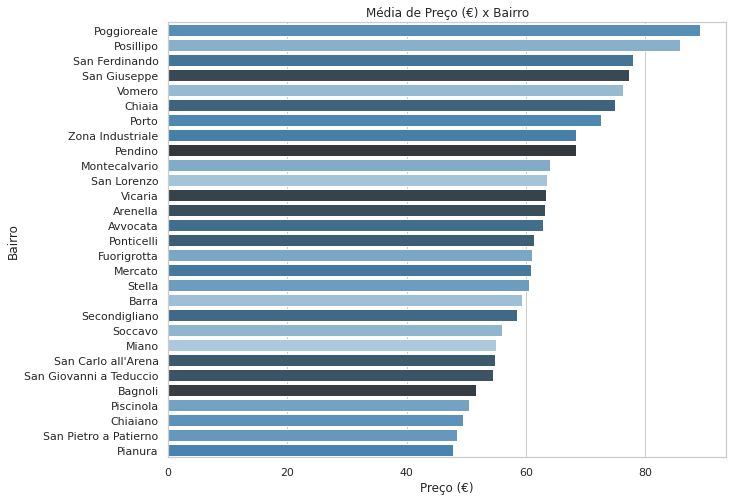

In [101]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))
fig = plt.subplots_adjust(hspace= 0.3)

sns.set(style="whitegrid", color_codes=True)
data = df_clean.groupby("neighbourhood").size() 
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 

# gráfico da média de preço por bairro
ax1 = sns.barplot(x=list(df_clean.groupby(['neighbourhood']).price.mean().values), y=list(df_clean.groupby(['neighbourhood']).price.mean().index), palette=np.array(pal[::-1])[rank], order= df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False).index)
ax1.set_xlabel('Preço (€)')
ax1.set_ylabel('Bairro')
ax1.set_title("Média de Preço (€) x Bairro");

Este gráfico ilustra claramente a relação entre preços médios para aluguel diário de um imóvel em cada bairro. Porém os valores médios podem não ser a melhor forma de avaliarmos alguns cenários, principalmente em casos de pouca amostragem.

A fim de evitarmos informações pouco representativas, vamos analisar os dados relativos ao preço de outras formas. Para isso iniciaremos avaliando a quantidade de imóveis disponíveis em cada bairro.

In [102]:
 # quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts().sort_values(ascending = False)

San Lorenzo                1196
Pendino                     703
San Ferdinando              601
Chiaia                      482
San Giuseppe                472
Avvocata                    422
Montecalvario               413
Porto                       373
Stella                      303
San Carlo all'Arena         267
Vomero                      236
Vicaria                     155
Arenella                    143
Fuorigrotta                 132
Zona Industriale            129
Mercato                     106
Posillipo                    94
Bagnoli                      57
Poggioreale                  31
San Giovanni a Teduccio      23
Chiaiano                     21
Ponticelli                   13
San Pietro a Patierno        12
Secondigliano                11
Piscinola                     8
Barra                         8
Pianura                       7
Soccavo                       6
Miano                         2
Name: neighbourhood, dtype: int64

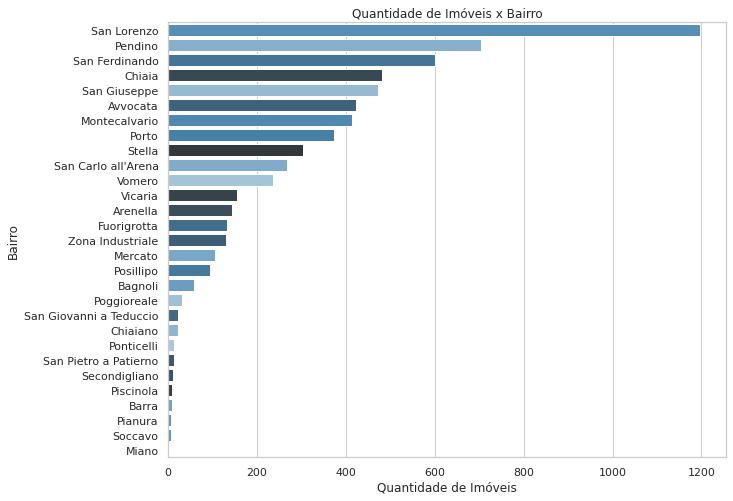

In [103]:
fig, ax2 = plt.subplots(1,1, figsize=(10, 8))
fig = plt.subplots_adjust(hspace= 0.3)

sns.set(style="whitegrid", color_codes=True)
data = df_clean.groupby("neighbourhood").size() 
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 

# gráfico da média de preço por bairro
ax1 = sns.barplot(x=list(df_clean.neighbourhood.value_counts()), y=list(df_clean.neighbourhood.value_counts().index), palette=np.array(pal[::-1])[rank], order= df_clean.neighbourhood.value_counts(ascending = False).index)
ax1.set_xlabel('Quantidade de Imóveis')
ax1.set_ylabel('Bairro')
ax1.set_title("Quantidade de Imóveis x Bairro");

Comparando visualmente as informações ilustradas nos gráficos de média de preço e quantidade de imóveis, ambas por bairro, podemos realizar algumas leituras:


*   Os cinco bairros com a média de preço mais alta (*Poggioreale, Posillipo, San Ferdinando, San Giuseppe e Vomero*) possuem uma quantidade significativa de hospedagens, tornando relevante a informação do preço médio (representa de forma fidedigna o preço da região).

*   Já os cinco bairros com o preço médio mais baixo (*Bagnoli, Piscinola, Chiaiano, San Pietro a Patierno e Pianura*) possuem poucas hospedagens disponíveis, sendo que o único bairro com mais de 25 imóveis para aluguel é *Bagnoli*.

Já podemos começar a identificar certos padrões, mas vamos explorar mais os dados e obter melhores *insights*!






#### Localização Geográfica

Primeiramente vamos procurar entender qual a diferença entre os bairros de maior e menor preço médio de aluguel. Mas, para isso, precisamos entender algumas características geográficas da região. Abaixo está uma ilustração retirada da plataforma *Inside Airbnb* para facilitar a nossa visualização.

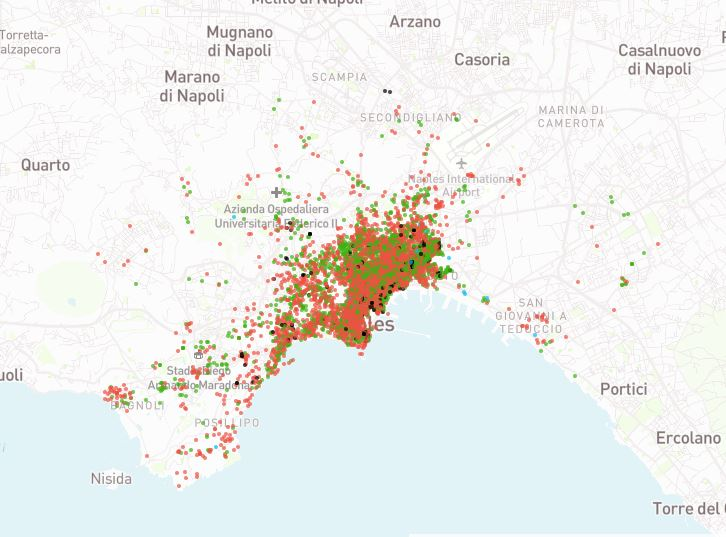



Através desta ilustração fica simples de visualizarmos as regiões litorâneas. Compare com o gráfico hexabinário gerado pelas variáveis `longitude` e `latitudade` de todas hospedagens de nosso DataFrame:

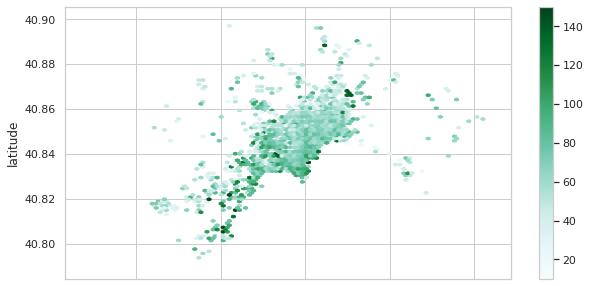

In [104]:
df_clean.plot.hexbin(x = 'longitude', y='latitude', C='price', extent=(14.12,14.36,40.79,40.9), figsize=(10,5));

Vamos gerar mais dois gráficos hexabinários, desta vez segregando e ilustrando as hospedagens dos bairros de maior e menor preço médio de aluguel.

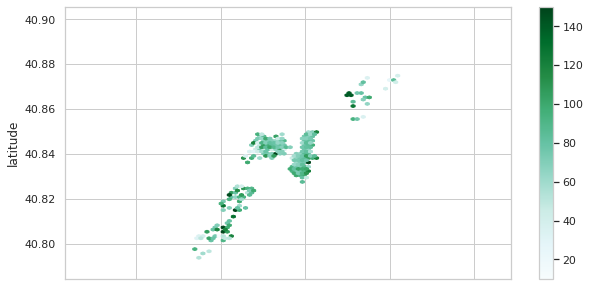

In [105]:
# gráfico hexabinário das hospedagens dos bairros mais "caros"
df_clean[(df_clean.neighbourhood == 'Poggioreale') | (df_clean.neighbourhood == 'Posillipo') | (df_clean.neighbourhood == 'San Ferdinando') | (df_clean.neighbourhood == 'San Giuseppe') | (df_clean.neighbourhood == 'Vomero')].plot.hexbin(x = 'longitude', y='latitude', C='price', extent=(14.12,14.36,40.79,40.9), figsize=(10,5));

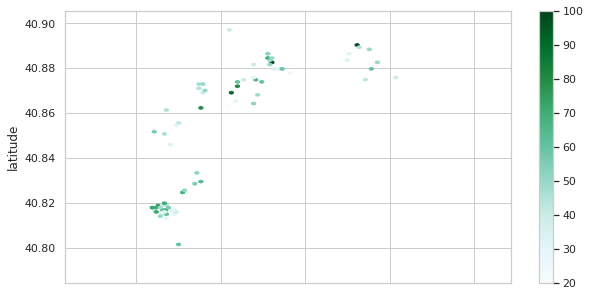

In [106]:
# gráfico hexabinário das hospedagens dos bairros mais "baratos"
df_clean[(df_clean.neighbourhood == 'Bagnoli') | (df_clean.neighbourhood == 'Piscinola') | (df_clean.neighbourhood == 'Chiaiano') | (df_clean.neighbourhood == 'San Pietro a Patierno') | (df_clean.neighbourhood == 'Pianura')].plot.hexbin(x = 'longitude', y='latitude', C='price', extent=(14.12,14.36,40.79,40.9), figsize=(10,5));

Note que os três gráficos possuem a mesma escala e tamanho. Comparando os gráficos e a ilustração retirada do *Inside Airbnb*, é possível verificar que os bairros de maior preço médio de aluguel estão situados em uma região litorânea.

Esse é um fator de extrema relevância e justifica a diferença no preço médio, tendo em vista que a região de Nápoles possui diversos pontos turísticos próximos ao litoral. O porto da cidade é um dos maiores da Itália e possui uma série de monumentos históricos que atraem diversos turistas.

<br>
<center><img alt="Porto de Nápoles" width="60%" src="https://www.planetware.com/photos-large/I/naples-and-its-harbor.jpg"></center>
<center>Região portuária de Nápoles</center>
<br>

Para prosseguirmos com nossa análise, vamos criar um novo DataFrame com dados de alguns dos principais pontos turísticos da cidade. Assim conseguiremos visualizar a distribuição geográfica dos mesmos em relação às hospedagens.

In [107]:
pontos_turisticos = [
    {'Nome': 'Palazzo Reale', 'latitude': 40.83709564833978, 'longitude': 14.250533867622323},
    {'Nome': 'Castel Nuovo', 'latitude': 40.838694250146304, 'longitude': 14.253949514708827},
    {'Nome': 'Piazza del Plebiscito', 'latitude': 40.836761746493686, 'longitude': 14.250884775196896},
    {'Nome': "Castel Sant'Elmo", 'latitude': 40.8452139596658, 'longitude': 14.240397512855619},
    {'Nome': 'Galleria Borbonica', 'latitude': 40.83404114972354, 'longitude': 14.245689529811578},
    {'Nome': 'Napoli Sotterranea Percorso Ufficiale', 'latitude': 40.852628096753605, 'longitude': 14.261382761676549},
    {'Nome': 'Duca di Martina National Ceramic Museum at Villa Floridiana', 'latitude': 40.840428498176905, 'longitude': 14.234129947560671},
    {'Nome': "Castel dell'Ovo", 'latitude': 40.82946238581796, 'longitude': 14.25056329240208}
]

df_pontos_turisticos = pd.DataFrame(pontos_turisticos)
df_pontos_turisticos.head()

,Nome,latitude,longitude
0,Palazzo Reale,40.837096,14.250534
1,Castel Nuovo,40.838694,14.253950
2,Piazza del Plebiscito,40.836762,14.250885
3,Castel Sant'Elmo,40.845214,14.240398
4,Galleria Borbonica,40.834041,14.245690


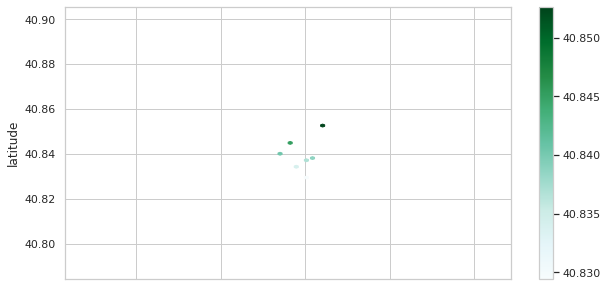

In [108]:
# gráfico hexabinário das hospedagens dos bairros mais "caros"
df_pontos_turisticos.plot.hexbin(x = 'longitude', y='latitude', C=1, extent=(14.12,14.36,40.79,40.9), figsize=(10,5));

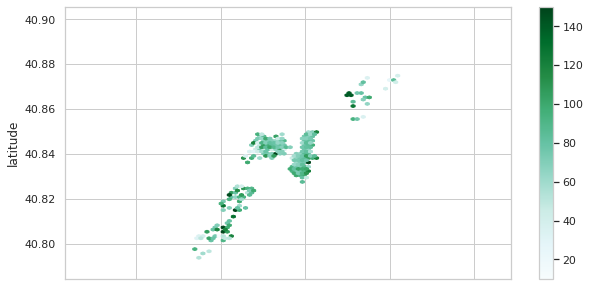

In [109]:
# relembrando o gráfico hexabinário das hospedagens dos bairros mais "caros"
df_clean[(df_clean.neighbourhood == 'Poggioreale') | (df_clean.neighbourhood == 'Posillipo') | (df_clean.neighbourhood == 'San Ferdinando') | (df_clean.neighbourhood == 'San Giuseppe') | (df_clean.neighbourhood == 'Vomero')].plot.hexbin(x = 'longitude', y='latitude', C='price', extent=(14.12,14.36,40.79,40.9), figsize=(10,5));

Comparando o gráfico hexabinário dos seletos pontos turísticos com o gráfico dos bairros com maior preço médio de aluguel, podemos verificar que os pontos turísticos estão situados na região de maior concentração das hospedagens destes bairros. Pode-se estipular um centro geométrico para facilitar a visualização.



#### Preço Máximo e Mínimo x Bairro

Para concluirmos a análise do preço relacionado à localização geográfica da hospedagem, vamos avaliar as opções de maior e menor preço para cada bairro, tendo em vista que até o momento trabalhamos apenas com o preço médio. Essa análise possibilitará visualizarmos o *delta* do preço naquela região, aumentando a visão geral das opções de hospedagem.

In [110]:
# ver preços mínimos por bairro
df_clean.groupby(['neighbourhood']).price.min().sort_values(ascending = False)

neighbourhood
Miano                      50
Ponticelli                 35
San Pietro a Patierno      32
Soccavo                    30
Pianura                    30
Vomero                     29
Bagnoli                    26
Secondigliano              25
Piscinola                  25
Barra                      20
Chiaia                     20
Chiaiano                   20
Poggioreale                20
San Giuseppe               20
San Giovanni a Teduccio    18
Arenella                   18
Fuorigrotta                18
Zona Industriale           17
San Ferdinando             16
Porto                      15
San Lorenzo                15
Pendino                    15
Montecalvario              15
Mercato                    15
Avvocata                   14
Stella                     14
Vicaria                    13
Posillipo                  10
San Carlo all'Arena        10
Name: price, dtype: int64

Vamos ver quais são as entradas que configuram as hospedagens de preço mais baixo:

In [119]:
df_clean.loc[df_clean.price == 10]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1105,14728176,Vista sulle Stelle del Cammino.,847572,Alfredo,Posillipo,40.803944,14.198655,Shared room,10,1,0,0.00,1,73,0
5963,47212315,Los Mochileros Hostel 8 Bed Dorm,357948143,Alessandro,San Carlo all'Arena,40.869150,14.270600,Shared room,10,1,77,7.48,5,0,77


In [111]:
# ver preços máximos por bairro
df_clean.groupby(['neighbourhood']).price.max().sort_values(ascending = False)

neighbourhood
Arenella                   154
Vomero                     154
San Lorenzo                154
San Giuseppe               153
San Ferdinando             153
Montecalvario              153
Pendino                    151
Avvocata                   150
Vicaria                    150
Stella                     150
San Carlo all'Arena        150
Posillipo                  150
Porto                      150
Zona Industriale           150
Mercato                    150
Fuorigrotta                150
Chiaia                     150
Poggioreale                140
Secondigliano              140
San Giovanni a Teduccio    129
Bagnoli                    109
Piscinola                  100
San Pietro a Patierno      100
Ponticelli                 100
Chiaiano                    90
Soccavo                     85
Pianura                     80
Barra                       71
Miano                       60
Name: price, dtype: int64

Vamos ver quais são as entradas que configuram as hospedagens de preço mais elevado:

In [120]:
df_clean.loc[df_clean.price == 154]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2699,25470454,A Casa Tua,148692345,Mario,Vomero,40.84122,14.22572,Entire home/apt,154,1,8,0.22,1,42,0
5332,42595994,Quartino 109,339317933,Francesco,San Lorenzo,40.84896,14.25642,Entire home/apt,154,3,2,0.13,1,0,1
6018,48117072,"Villa Montedonzelli B&B, room Deluxe Tripla",387259094,Vincenzo,Arenella,40.85515,14.22895,Private room,154,1,0,0.00,3,0,0


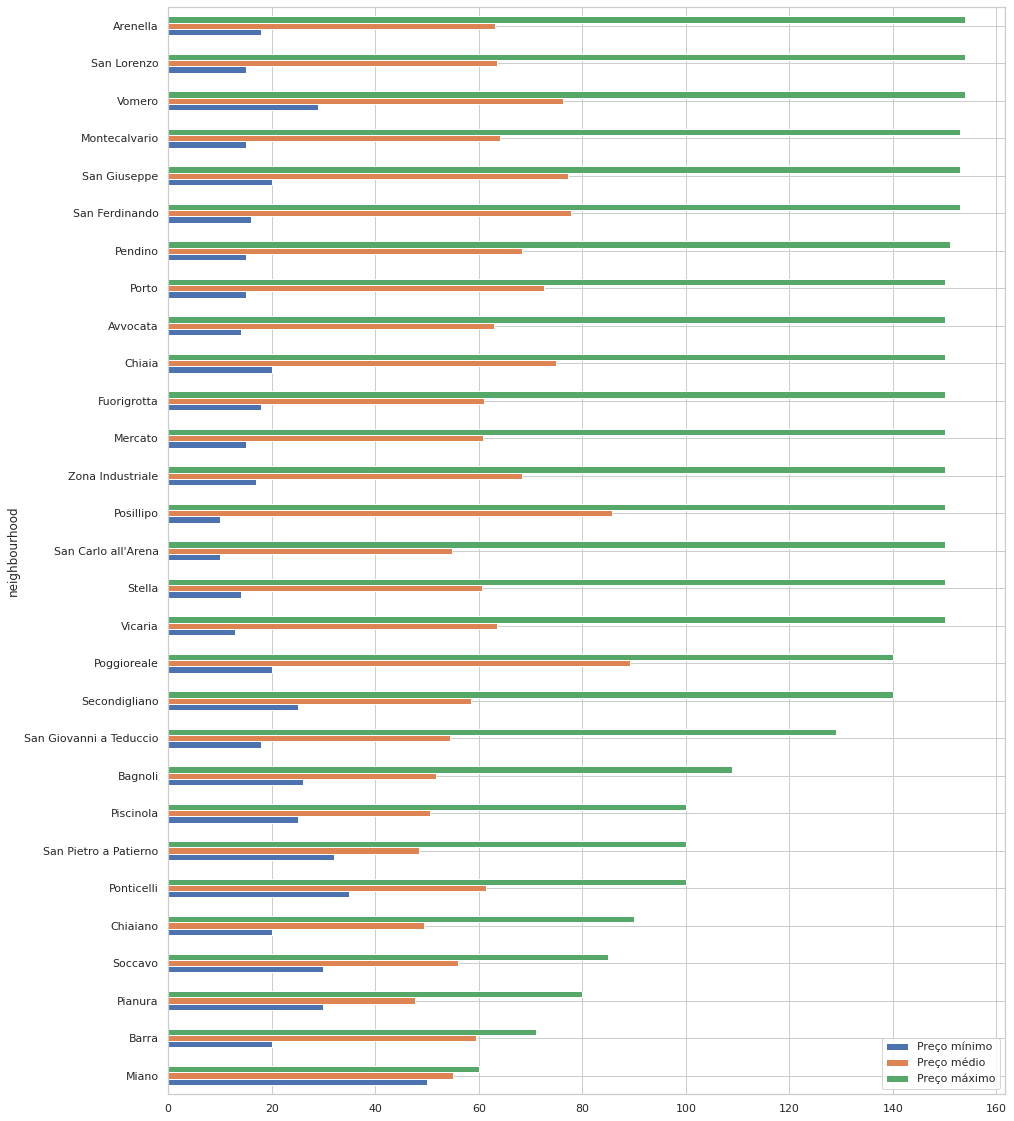

In [112]:
# comparar preço mínimo, médio e máximo por bairro
pd.concat([df_clean.groupby(['neighbourhood']).price.min().rename('Preço mínimo'),
           df_clean.groupby(['neighbourhood']).price.mean().rename('Preço médio'),
           df_clean.groupby(['neighbourhood']).price.max().rename('Preço máximo')],
          axis=1).sort_values('Preço máximo').plot.barh(figsize = (15, 20));

#### Tipos de Imóveis

Com mais essa análise conseguimos transcorrer um resumo dos aluguéis e entender quais as correlações do preço e a localização geográfica das hospedagens na cidade de Nápoles. Mas que *insights* conseguiremos extrair das informações relacionadas aos tipos de imóveis para alugar na região?

É o que iremos verificar nas próximas operações. Começando pela verificação da quantidade disponível de cada tipo de imóvel.

In [113]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    3791
Private room       2361
Hotel room          236
Shared room          38
Name: room_type, dtype: int64

In [114]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    58.994709
Private room       36.741363
Hotel room          3.672580
Shared room         0.591348
Name: room_type, dtype: float64

Já obtivemos as informações brutas, vamos inserir as mesmas em um gráfico para facilitar a nossa visualização e leitura.

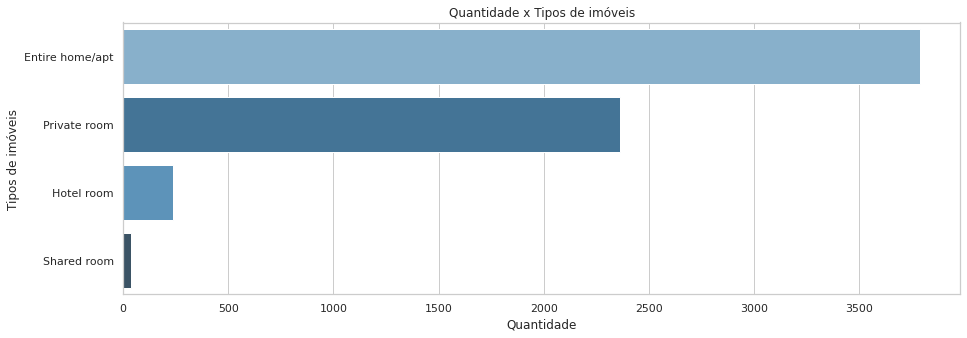

In [115]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set(style="whitegrid", color_codes=True)
data = df_clean.groupby("room_type").size() 
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 

ax2 = sns.barplot(x= df_clean.room_type.value_counts().values, y= df_clean.room_type.value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Quantidade')
ax2.set_ylabel('Tipos de imóveis')
ax2.set_title("Quantidade x Tipos de imóveis");

Será que há uma discrepância muito significativa no preço médio de aluguel dentre os quatro tipos de imóveis disponíveis?

Vamos verificar.

In [121]:
# média dos preços por bairro
df_clean.groupby(['room_type']).price.mean().sort_values(ascending = False)

room_type
Hotel room         78.588983
Entire home/apt    69.316275
Private room       65.174502
Shared room        31.973684
Name: price, dtype: float64

## Conclusões


No decorrer da análise nos deparamos com uma série de dados ausentes e *outliers*, sendo necessário o tratamento dos dados para extração das informações de forma mais confiável e relevante. As variáveis de valores nulos foram rapidamente resolvidas, sem impacto às avaliações posteriores. Já os *outliers* exigiram uma minuciosa avaliação estatística de duas variáveis específicas: o preço (`price`) e a quantidade mínima de noites (`minimum_nights`). Ao final do processo de tratamentos dos dados, reduzimos de 7151 para 6426 entradas, configurando uma redução de 725 linhas.

Em nossa avaliação preliminar de correlação das variáveis numéricas não conseguimos identificar nenhum grau de correlação alto suficiente para dedicarmos tempo à analisá-lo.

Ao calcularmos os preços médios do aluguel, para uma diária, de cada bairro, conseguimos extrair uma série de informações um tanto quanto interessantes. Vimos que os bairros com maior e menor preço médio são *Poggioreale* (€89.13) e *Pianura* (€47.71), enquanto o preço médio geral da cidade é de €67.91.

Estes dados nos trouxeram alguns *insights*, nos levando a procurar entender o porquê desta diferença significativa no preço entre os bairros. Vimos, através dos gráficos hexabinários, que a localização dos bairros mais caros é mais próxima à área litorânea da cidade, região que também abriga diversos dos mais famosos pontos turísticos de Nápoles.

<br>

<center><img alt="Posillipo" width="70%" src="https://www.sorrentoreview.com/uploads/2/6/3/6/26365745/posillipo-naples-8_orig.jpg"></center>
<center>Praia no bairro <i>Posillipo</i></center>

<br>

<center><img alt="Stazione Marittima" width="70%" src="https://dynamic-media-cdn.tripadvisor.com/media/photo-o/19/de/69/f0/smart-hotel-napoli.jpg?w=900&h=-1&s=1"></center>
<center><i>Stazione Marittima di Napoli</i></center>

<br>

Na sequência foram avaliados os preços máximos e mínimos de cada bairro, onde foi possível verificar que o preço mínimo de hospedagem é de €10 a diária. Preço válido para dois imóveis, um em *San Carlo all'Arena* e um em *Posillipo*. Já o preço máximo de hospedagem é de €154 a diária. Preço válido para três imóveis, um em *Vomero*, um em *San Lorenzo* e um em *Arenella*.

E, por fim, avaliamos quais os tipos de imóveis disponíveis e suas respectivas quantidades. Nesta análise foi possível verificar que, em Nápoles, há uma maior disponibilidade de casas/apartamentos privados do que os demais tipos de imóveis, em um total de 3791 unidades. Já o tipo de imóvel com o menor número de opções na região é o de quarto compartilhado, com apenas 38 unidades.

--------

De maneira resumida, esta análise dos dados do *Airbnb* da cidade de Nápoles, na Itália, nos dá uma rápida e direta leitura do cenário de hospedagens na região. Tais informações são extremamente relevantes e podem ajudar não somente os turistas em escolher sua hospedagem, mas também imobiliárias, investidores e construtoras à tomarem suas decisões baseadas em dados.

Porém vale salientar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.